# 필요 패키지 import

In [2]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split # train test비율에 맞게 짜르기


import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [3]:
train = pd.read_csv('C:\\Users\\user\\Desktop\\computing\\outside\\dacon\\jobcare_recommend\\JobCare_data\\train.csv')
test = pd.read_csv('C:\\Users\\user\\Desktop\\computing\\outside\\dacon\\jobcare_recommend\\JobCare_data\\test.csv')
d_code=pd.read_csv('C:\\Users\\user\\Desktop\\computing\\outside\\dacon\\jobcare_recommend\\Jobcare_data\\속성_D_코드.csv',index_col=0).T.to_dict()
h_code=pd.read_csv('C:\\Users\\user\\Desktop\\computing\\outside\\dacon\\jobcare_recommend\\Jobcare_data\\속성_H_코드.csv',index_col=0).T.to_dict()
l_code=pd.read_csv('C:\\Users\\user\\Desktop\\computing\\outside\\dacon\\jobcare_recommend\\Jobcare_data\\속성_L_코드.csv',index_col=0).T.to_dict()

# 데이터 확인

In [4]:
train

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,501946,False,False,False,True,False,False,1,1,2,...,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,501947,True,True,False,True,False,False,1,6,2,...,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,501948,True,True,True,True,False,False,1,7,4,...,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1
501949,501949,True,False,False,True,False,False,1,1,2,...,2,660,147,3,4,259,456330,273797,2020-06-15 09:23:21,1


In [5]:
def add_code(df, d_code, h_code, l_code):
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [6]:
train = add_code(train, d_code, h_code, l_code)
test = add_code(test, d_code, h_code, l_code)

In [7]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,person_prefer_h_3_m,contents_attribute_h_m,person_prefer_h_1_l,person_prefer_h_2_l,person_prefer_h_3_l,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,...,359,528,250,48,48,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,...,359,528,250,250,48,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,...,452,453,169,169,169,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,...,452,453,169,169,169,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,...,316,453,169,169,3,169,984,980,954,2009


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

# 필요 데이터 추출

모델 학습시 id는 제외해야하고

베이스라인에선 contents_open_dt를 제거하고 진행하였습니다

In [9]:
train = train.drop(['id', 'contents_open_dt'], axis=1) 

test = test.drop(['id', 'contents_open_dt'], axis=1)

In [10]:
train

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,person_prefer_h_3_m,contents_attribute_h_m,person_prefer_h_1_l,person_prefer_h_2_l,person_prefer_h_3_l,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,...,368,422,3,94,58,94,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,...,399,417,94,94,94,94,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,...,366,363,48,250,48,48,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,...,315,381,71,226,1,71,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,...,480,381,208,208,208,71,1607,1606,1605,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,False,False,False,True,False,False,1,1,2,2,...,398,373,58,3,94,58,352,347,346,2006
501947,True,True,False,True,False,False,1,6,2,1,...,398,425,94,94,94,94,155,138,99,2006
501948,True,True,True,True,False,False,1,7,4,1,...,422,373,58,94,94,58,437,417,407,2006
501949,True,False,False,True,False,False,1,1,2,1,...,523,524,250,48,250,250,659,652,651,2006


In [11]:
train.iloc[:, 32]

0         1
1         0
2         0
3         0
4         0
         ..
501946    1
501947    1
501948    1
501949    1
501950    1
Name: target, Length: 501951, dtype: int64

# 모델 학습

RandomForest를 이용한 학습

In [12]:
model = RandomForestClassifier(n_estimators=100, max_depth=30, n_jobs=-1)

# x = train.iloc[:, :-1]
# y = train.iloc[:, -1]
x=train.drop(['target'],axis=1)
y=train.iloc[:,32]

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.3, random_state=531)

model.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=30, n_jobs=-1)

# Test set 예측

In [13]:
pred = model.predict(xTest)

f1 = f1_score(yTest, pred)
accuracy = accuracy_score(yTest, pred)
print('f1 score :', f1)
print('accuracy :', accuracy)

f1 score : 0.6295683309612895
accuracy : 0.6180189393436308


In [14]:
preds=model.predict(test)

# 제출파일 생성

In [15]:
submission = pd.read_csv('C:\\Users\\user\\Desktop\\computing\\outside\\dacon\\jobcare_recommend\\JobCare_data\\sample_submission.csv')
submission['target'] = preds

submission.to_csv('baseline.csv', index=False)

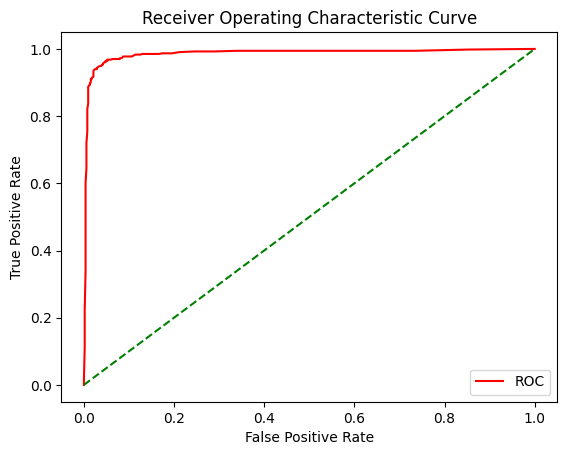

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
data_X, cls_lab = make_classification(n_samples=2100, n_classes=2, weights=[1,1], random_state=2)
train_X, test_X, train_y, test_y = train_test_split(data_X, cls_lab, test_size=0.5, random_state=2)

model =RandomForestClassifier()
model.fit(train_X, train_y)

probs = model.predict_proba(test_X)
prob = probs[:, 1]
fper, tper, thresholds = roc_curve(test_y, prob)
plot_roc_curve(fper, tper)